Contrast modulations with SpectraTuneLab
========================================

Multiprimary devices with good linearity, high resolution and rapid spectral switching times may be used to present sinusoidal modulations of photoreceptor-targeted contrast. Such stimuli have been used previously in pupillometry studies Used in pupillometry to explore phase relationship. In this case, we simply find a solution for each point on the sinusoid. Linear algebra is best suited to this method as it guarantees a linear uni-directional scaling of the primaries.

Spectra Tune Lab [(STLAB: Ledmotive Technologies, LLC)](https://ledmotive.com/) is a spectrally tuneable light engine with ten independantly addressable primaries. With a spectral switching time of 10 ms and 12-bit resolution depth, it is a good device for silent substitution. Here we demonstrate how to create sinusoidal contrast modulaions for STLAB. 

In [40]:
from pysilsub.problem import SilentSubstitutionProblem as SSP

ssp = SSP.from_json('../../data/STLAB_1_York.json')

ssp.ignore = ['R']
ssp.silence = ['M', 'L', 'I']
ssp.isolate = ['S']
ssp.target_contrast = 4.
ssp.background = [.5] * 10
ssp.print_problem()

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Background: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Ignoring: ['R']
Silencing: ['M', 'L', 'I']
Isolating: ['S']
Target contrast: 4.0


<AxesSubplot:title={'center':'STLAB_1 (binocular, left eye) SPDs'}, xlabel='Wavelength (nm)', ylabel='Power'>

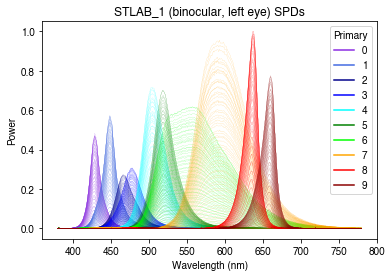

In [41]:
ssp.spds = ssp.spds.div(ssp.spds.max().max())
ssp.plot_spds()

	Background luminance: 51228.57787476531
	Modulation luminance: 51034.83596875386
	Background xy: [ 0.39079467  0.40985616]
	Modulation xy: [ 0.37216428  0.37305779]


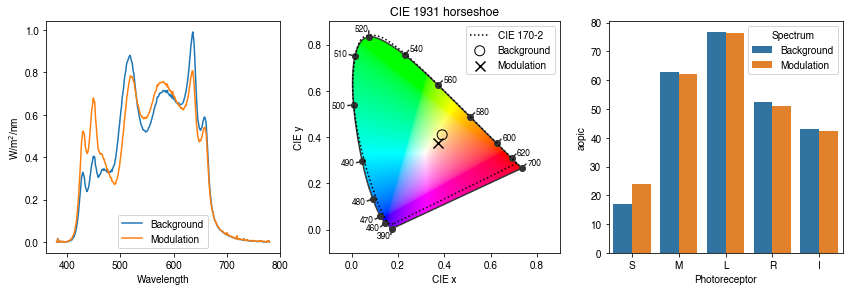

In [43]:
result = ssp.linalg_solve()
_ = ssp.plot_ss_result(result)